# 데이터시각화
> DV 잡기술 정리

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "데이터시각화"]

```python
fig.add_axes() ## 액시즈를 fig에 추가하라. 
fig.axes ## 현재 fig에 있는 액시즈 정보
```

# 주로쓰는 패키지들

In [18]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
import cv2 as cv
from scipy import stats

# 유용한 잡기술

코드 맨위 " #collapse " : 복잡한 코드가 주피터에 올라갈 때 인풋을 숨길 수 있음 #숨기기

```python
pd.concat([df1,df2]) : 데이터프레임 합치기
```

>ignore_index=True -> 기존에 있던 인덱스를 무시해라
>> ${0\sim9} + {0\sim9}$ (기존) -> 0~19 (무시)

코드 맨위 " #hide " : 인풋 아웃풋 둘다 숨기기

```python
pd.DataFrame({'열이름지정1':y1(리스트나 함수),'열이름지정2':['A']*len(y1)(리스트나 함수)})
```
> $\to$ 데이터 프레임 생성

```python
HTML(저장한플랏이름.to_html(include_plotlyjs='cdn',include_mathjax=False))
```
> 생성된 플랏을 html로 바꾸어 블로그에서 읽을 수 있게 함, 패키지 필요, IPython.display의 HTML

```python
숫자형.round(n) #소수 n째자리에서 반올림
```

```python
np.random.seed(아무숫자) : 값이 안변하도록 시드설정
```

이미지 불러오기
```python
img = cv.imread('사진이름.확장자',흑백원하면 0(안쓰면 컬러) ) :wd에 있어야함
```

```python
np.corrcoef([x,y])  상관계수 구하기
```

In [23]:
k=np.linspace(-2,2,9)   #-2 부터 2까지 9개의 등분
k

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

```Python
range(n)  #n 까지의 자연수 출력
```


# 웹사이트에 공개된 csv 불러오기

```Python
pd.read_csv('웹주소.csv')
```

`-` 깃허브 저장소에 아예 데이터만 따로 모아서 관리하는 것도 좋은 방법입니다. 

____________

### 여러그림을 그리기 

### 라인플랏을 그리는 방법 

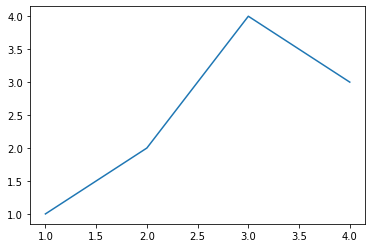

In [5]:
import matplotlib.pyplot as plt 
x=[1,2,3,4]
y=[1,2,4,3]
plt.plot(x,y)

### 산점도 그리기 (옵션만 바꾼것)

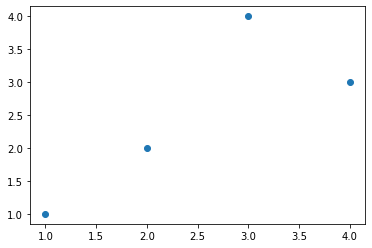

In [1]:
import matplotlib.pyplot as plt 
x=[1,2,3,4]
y=[1,2,4,3]
plt.plot(x,y,'o')

#### (1) 겹쳐그리기 

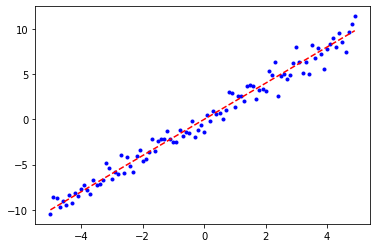

In [96]:
#ex)
x=[1,2,3,4]
y=[1,2,4,3]
x=np.arange(-5,5,0.1)
y=2*x+np.random.normal(loc=0,scale=1,size=100)
plt.plot(x,y,'.b')
plt.plot(x,2*x,'--r')

#### (2) 따로그리기 - subplots

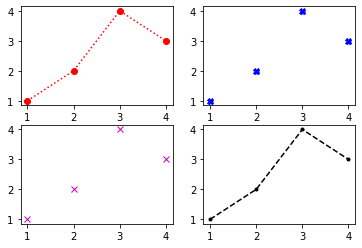

In [3]:
x=[1,2,3,4]
y=[1,2,4,3]
_, axs = plt.subplots(2,2)  # 2x2의 서브플랏을 만들겠다. 따로그리기의 기본
# 리턴값이 (fig,axs) 임 그래서 fig자리는 어느것이든 상관이 없어서 아무것도 안쓰려고 _ 를 쓴것
axs[0,0].plot(x,y,'o:r') 
axs[0,1].plot(x,y,'Xb') 
axs[1,0].plot(x,y,'xm') 
axs[1,1].plot(x,y,'.--k') 

____

# lambda

### lambda 사용법

In [32]:
f = lambda x,y,z : x+y+z ## lambda 입력:출력   #이자체가 오브젝트로 취급된다.

In [33]:
f(2,3,4)

9

### lambda 디폴트입력값

In [34]:
x= (lambda a='fee',b='fie',c='foe': a+b+c) 

In [35]:
x('wee')

'weefiefoe'

### lambda의 리스트화

In [36]:
l = [lambda x: x**2, lambda x: x**3, lambda x: x**4]  #리스트안에 람다 3개

In [37]:
for f in l:
    print(f(2))

4
8
16


### lambda의 딕셔너리화

In [38]:
dct={'f1': (lambda x: x+1), 'f2': (lambda x: x+22), 'f3': (lambda x: x+333)} 

In [39]:
dct['f1'](1), dct['f2'](1), dct['f3'](1)

(2, 23, 334)

### lambda의 조건부 출력

In [55]:
lower = lambda x,y : x if x<y else y

In [56]:
lower('a','b') 

'a'

In [57]:
lower('c','b') 

'b'

### lambda expression 을 return 입력가능 

In [58]:
def action(x):
    return (lambda y: x+y) #리턴을 람다로

In [59]:
act = action(99) ## act를 99+y를 수행하는 함수로 저장
act2 = action(98) ## act2를 98+y를 수행하는 함수로 저장

- action은 마치 함수를 만드는 함수같다.. 

In [60]:
print(act(2))  # act안에 y에 2를 넣겠다. 99+2
print(act2(2)) # act2안에 y에 2를 넣겠다. 98+2

101
100


### 예제6의 발전 

In [61]:
action = lambda x:  (lambda y: x+y)  # 람다 출력에 또 람다

In [62]:
act= action(99) #x에 99를 넣은 함수 act 선언 
act2=action(98) #x에 98를 넣은 함수 act2 선언

In [63]:
print(act(2))
print(act2(2))

101
100


괄호를 생략하여 선언하면 

In [64]:
action = lambda x: lambda y: x+y 
act= action(99)
act2=action(98) 
print(act(2))
print(act2(2))   # 똑같다.

101
100


_____

# map 

In [65]:
map?
#map(func, *iterables) --> map 개체

#다음 인수를 사용하여 함수를 계산하는 반복자를 만듭니다.
#각 반복 사항  최단 시간이 소진되면 중지됩니다.

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     


### map 사용방법 

In [66]:
def inc(x): return x+1 #임시로 쓸건데 공간도 차지하고 좀 그럼 $\to$ 람다로 처리

In [67]:
list(map(inc,[1,2,3,4]))

[2, 3, 4, 5]

### 예제1의 변형(람다사용) 

In [68]:
list(map(lambda x: x+1,[1,2,3,4]))

[2, 3, 4, 5]

In [69]:
list(map(def inc(x): return x+1,[1,2,3,4]))  #안됨

SyntaxError: invalid syntax (<ipython-input-69-e70d258d54b1>, line 1)

- 함수명을 쓰는 자리에 lambda로 표현한 오브젝트 자체를 전달할 수 있다. $\to$ 코드가 간단하다. 

### map과 리스트컴프리헨션 비교 

(함수선언) 

In [70]:
f = lambda x: 'X' in x 

In [71]:
f('X1'),f('X2'),f('Y1'),f('Y2')

(True, True, False, False)

(map) 

In [72]:
list(map(f,['X1','X2','Y3','Y4']))

[True, True, False, False]

(리스트컴프리헨션과 비교) 

In [73]:
[f(x) for x in ['X1','X2','Y3','Y4']]

[True, True, False, False]

### 두개의 입력을 받는 함수(pow) map, 리스트컴프리헨션 비교 

(함수소개)

In [74]:
pow(2,4) #2를 4제곱

16

(map)

In [75]:
list(map(pow,[2,2,2,3,3,3],[0,1,2,0,1,2]))

[1, 2, 4, 1, 3, 9]

(리스트컴프리헨션과 비교)

In [76]:
[pow(x,y) for x,y in zip([2,2,2,3,3,3],[0,1,2,0,1,2])]
#zip이라는 새로운 오브젝트 생성

[1, 2, 4, 1, 3, 9]

> map은 (하나의 함수,다양한 입력)인 경우 사용가능 

In [77]:
l=[lambda x: x+1, lambda x: x+2, lambda x: x+3 ] 

In [78]:
list(map(l,[100,200,300]))

TypeError: 'list' object is not callable

리스트컴프리헨션은 (다양한함수,다양한입력)이 가능함 

In [79]:
[l[i](x) for i,x in zip([0,1,2],[100,200,300])]

[101, 202, 303]

리스트컴프리헨션은 (다양한함수,다양한입력)이 가능함 

In [80]:
[l[i](x) for i,x in zip([0,1,2],[100,200,300])]

[101, 202, 303]

> 종합: map을 리스트컴프리헨션과 비교

>>(1) 반복인덱스를 쓰지 않는 장점

>>(2) 좀 더 제약적으로 사용할 수 밖에 없다는 단점

### 액시즈를 이용하여 2$\times$2 서브플랏 그리기 

In [96]:
fig = plt.figure()
fig.axes

[]

<Figure size 432x288 with 0 Axes>

In [97]:
fig.subplots(2,2) 
fig.axes

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

In [98]:
ax1,ax2,ax3,ax4=fig.axes 

In [99]:
ax1.plot([1,2,3],'ob')
ax2.plot([1,2,3],'or')
ax3.plot([1,2,3],'ok')
ax4.plot([1,2,3],'oy')

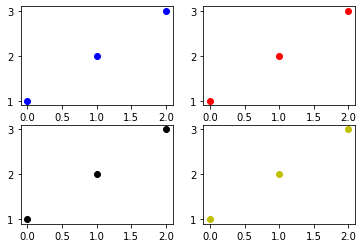

In [100]:
fig

`-` 단계적으로 코드를 실행하고 싶을때 

In [107]:
x=[1,2,3,4]
y=[1,2,4,3]

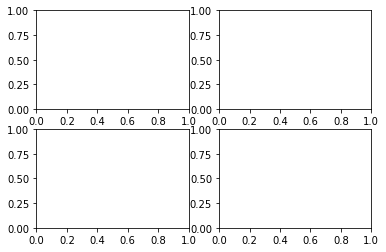

In [108]:
_, axs = plt.subplots(2,2) 

In [109]:
axs[0,0].plot(x,y,'o:r') 
axs[0,1].plot(x,y,'Xb') 
axs[1,0].plot(x,y,'xm') 
axs[1,1].plot(x,y,'.--k') 

- 어? 그림을 볼려면 어떻게 하지? 

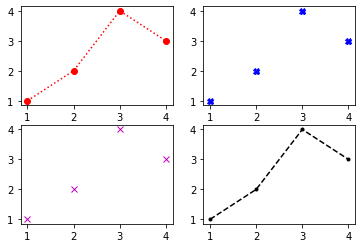

In [110]:
_

### plt.subplots()를 2$\times$2 subplot 그리기 -- 액시즈를 각각 변수명으로 저장

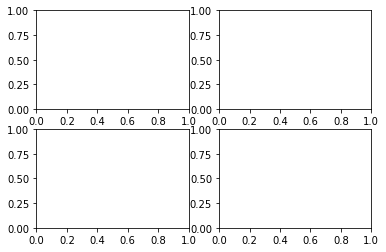

In [115]:
x=[1,2,3,4]
y=[1,2,4,3]
fig, axs = plt.subplots(2,2) 

In [120]:
(ax1,ax2), (ax3,ax4) = axs

In [121]:
ax1.plot(x,y,'o:r') 
ax2.plot(x,y,'Xb') 
ax3.plot(x,y,'xm') 
ax4.plot(x,y,'.--k') 

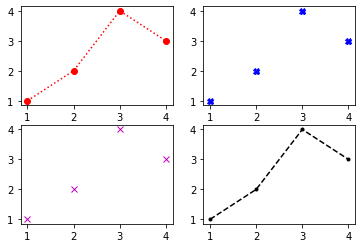

In [122]:
fig

### 제목설정 

#### 예제1: plt.plot()

In [129]:
x=[1,2,3]
y=[1,2,2] 

Text(0.5, 1.0, 'title')

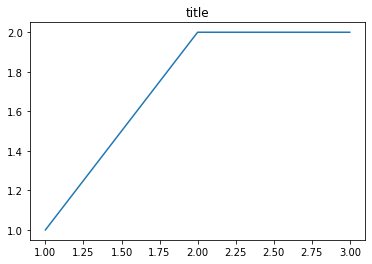

In [133]:
plt.plot(x,y)
plt.title('title')

#### 예제2: 액시즈를 이용

<AxesSubplot:>

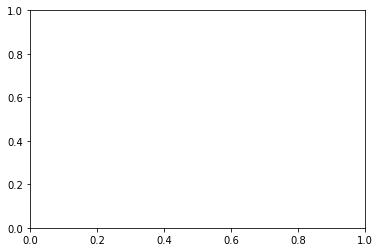

In [134]:
fig = plt.figure()
fig.subplots()

In [137]:
ax1=fig.axes[0]

In [140]:
ax1.set_title('title')

Text(0.5, 1.0, 'title')

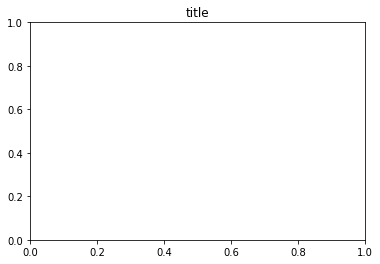

In [141]:
fig

`-` 문법을 잘 이해했으면 각 서브플랏의 제목을 설정하는 방법도 쉽게 알 수 있다.

### 예제3: subplot에서 각각의 제목설정 $\star$

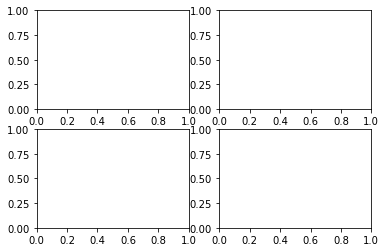

In [5]:
fig, ax = plt.subplots(2,2) 

In [6]:
(ax1,ax2),(ax3,ax4) =ax

In [7]:
ax1.set_title('title1')
ax2.set_title('title2')
ax3.set_title('title3')
ax4.set_title('title4')

Text(0.5, 1.0, 'title4')

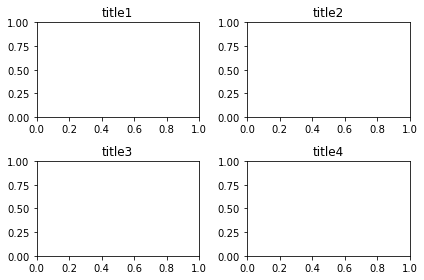

In [11]:
fig #뭔가 엉성함

`-` 보기싫음 $\to$ 서브플랏의 레이아웃 재정렬

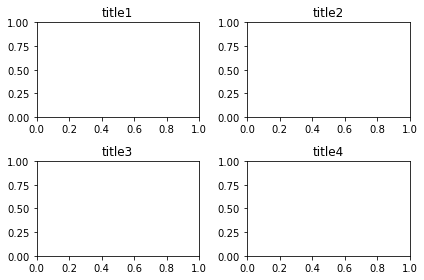

In [10]:
fig.tight_layout() # 외우세요.. 
fig #깔끔해짐

#### 예제4: 액시즈의 제목 + Figure제목 

In [155]:
fig.suptitle('sup title')

Text(0.5, 0.98, 'sup title')

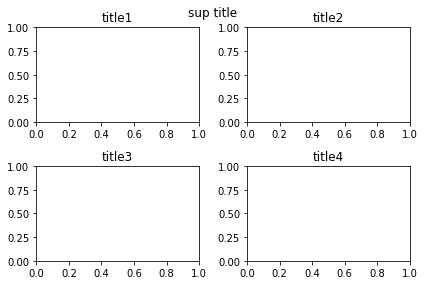

In [156]:
fig

In [157]:
fig.tight_layout()

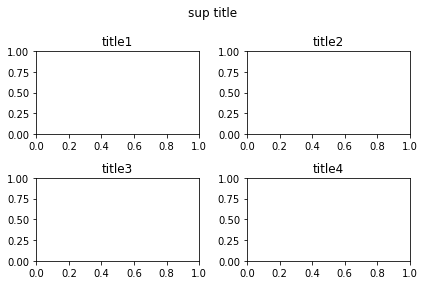

In [158]:
fig

### 축범위 설정

```Python
plt.xlim(-1,5) # plt 이용
plt.ylim(3,7)

ax1.set_xlim(-10,110)  #axs 이용
ax1.set_ylim(-5,5)
```

### 